In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from collections import Counter
from sklearn.metrics import f1_score, recall_score, roc_auc_score, auc, precision_recall_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pickle

ModuleNotFoundError: No module named 'seaborn'

In [3]:
path = r"./Modelos/"
model_file_name = "modelo_mlp.pkl"
with open(fr"{path}{model_file_name}", 'rb') as file:
    model = pickle.load(file)

In [46]:
df = pd.read_excel("prueba_de_campo.xls") # read in data downloaded to the local directory
df.head()

,Pos.,Edad,Sexo,Piel,F.Ingreso UCI,Fue un traslado,Procedencia,F.Egreso UCI,Modos VAM,Diag.Ing1,Diag.Ing2,Diag.Egr2,APACHE,TiempoVAM,Fallece
0,10,47,M,Blanca,2023-02-02,No,UCIE,2023-02-10 00:00:00,-- VCRP -- PS/ASV,3,0,0,9,120,0
1,12,35,F,Blanca,2023-02-07,Si,UCIE,2023-02-13 00:00:00,-- VCRP -- AVM,31,0,0,12,96,0
2,14,71,F,Blanca,2023-02-15,Si,UCIE,2023-02-23 00:00:00,-- VCRP,15,16,0,15,96,0
3,26,59,F,Blanca,2023-04-26,Si,Salon de operaciones,2023-04-28 00:00:00,-- PS/ASV,7,0,0,4,24,0
4,27,69,F,Blanca,2023-05-02,Si,UCIE,2023-05-06 00:00:00,-- VCRP,14,16,16,25,24,0


In [47]:
df = df.drop(['Pos.','Sexo','Piel','F.Egreso UCI','F.Ingreso UCI','Fue un traslado','Procedencia','Modos VAM'],axis=1)
df.head()

,Edad,Diag.Ing1,Diag.Ing2,Diag.Egr2,APACHE,TiempoVAM,Fallece
0,47,3,0,0,9,120,0
1,35,31,0,0,12,96,0
2,71,15,16,0,15,96,0
3,59,7,0,0,4,24,0
4,69,14,16,16,25,24,0


In [48]:
total=cantidad_instancias = df.shape[0]

conteo2 = (df['Diag.Ing2'] == df['Diag.Egr2']).sum()
diferentes2 = total - conteo2
print("ing 2 vs egr 2")
print(f"iguales: {conteo2}, diferentes: {diferentes2} ")


ing 2 vs egr 2
iguales: 29, diferentes: 47 


In [49]:
df['TiempoVAM'] = df['TiempoVAM']//24
df.head()

,Edad,Diag.Ing1,Diag.Ing2,Diag.Egr2,APACHE,TiempoVAM,Fallece
0,47,3,0,0,9,5,0
1,35,31,0,0,12,4,0
2,71,15,16,0,15,4,0
3,59,7,0,0,4,1,0
4,69,14,16,16,25,1,0


In [50]:
# df.loc[:, df.columns != 'Fallece'] = df.loc[:, df.columns != 'Fallece'].astype(float)
# df.head()

In [51]:
# for col in df.columns:
#     if col != 'Fallece':
#         df[col] = pd.to_numeric(df[col], downcast='float')
# df.head()


In [52]:
print(df.dtypes)


Edad         int64
Diag.Ing1    int64
Diag.Ing2    int64
Diag.Egr2    int64
APACHE       int64
TiempoVAM    int64
Fallece      int64
dtype: object


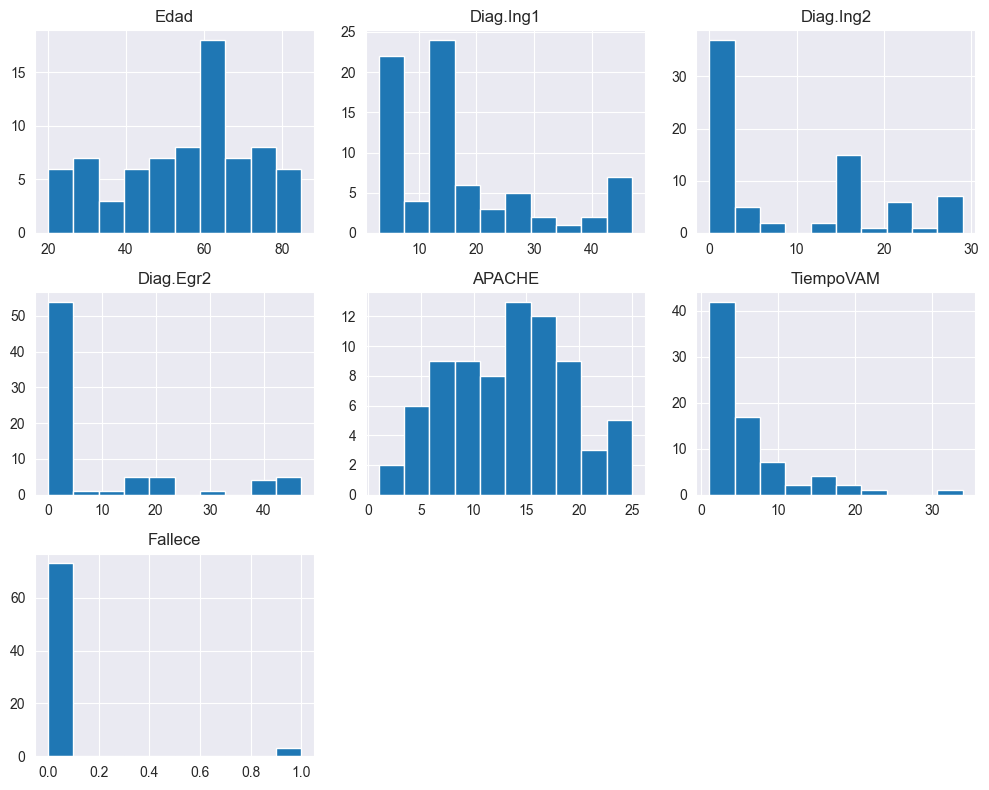

In [53]:
df.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

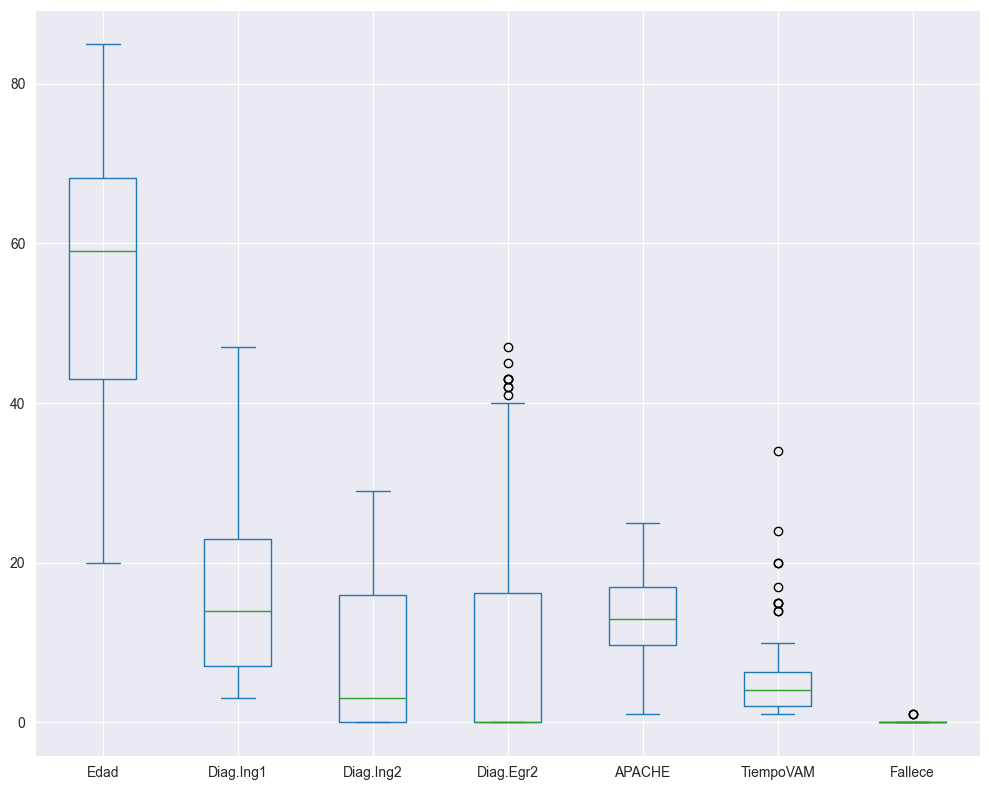

In [54]:
df.plot(kind='box', figsize=(10, 8))
plt.tight_layout()
plt.show()

In [55]:
#definimos nuestras etiquetas y features
y = df['Fallece']
X = df.drop('Fallece', axis=1)

In [56]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X)

In [57]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y, y_pred)
print("Matriz de confusion:\n", cm)


Matriz de confusion:
 [[63 10]
 [ 2  1]]


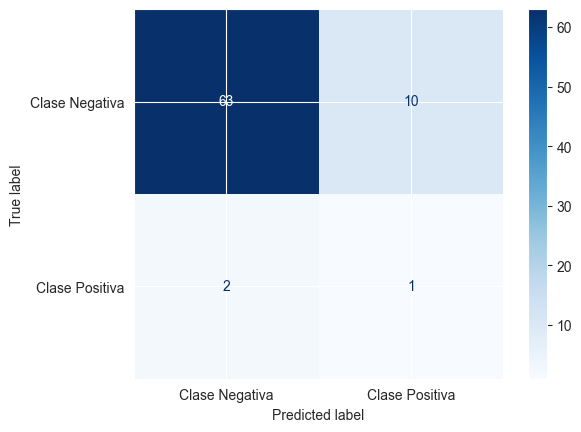

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay, cohen_kappa_score, balanced_accuracy_score

disp = ConfusionMatrixDisplay( confusion_matrix=cm, display_labels=["Clase Negativa", "Clase Positiva"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [59]:
# Obtener la probabilidad de pertenecer a la clase 1
df['Probabilidad_Clase_1'] = model.predict_proba(X)[:, 1]

# Guardar el DataFrame con la nueva columna
df.to_excel("predicciones_con_probabilidades.xlsx", index=False)
print("Probabilidades guardadas en predicciones_con_probabilidades.xlsx")

Probabilidades guardadas en predicciones_con_probabilidades.xlsx


In [60]:
targets=[1,0]

recall = recall_score(y, y_pred, labels=targets, average=None)
print("Recall Score:", recall)

f1 = f1_score(y, y_pred, labels=targets, average=None)
print("F1 Score:", f1)

# Calcular AUC-ROC
auc_roc = roc_auc_score(y, y_pred, average=None)
print("AUC-ROC:", auc_roc)

# Calcular Cohens Kappa
kappa = cohen_kappa_score(y, y_pred)
print("Cohens Kappa:", kappa)

# Calcular Balanced Accuracy
balanced = balanced_accuracy_score(y, y_pred)
print("Balanced Accuracy:", balanced)

Recall Score: [0.33333333 0.8630137 ]
F1 Score: [0.14285714 0.91304348]
AUC-ROC: 0.5981735159817352
Cohens Kappa: 0.08617234468937873
Balanced Accuracy: 0.5981735159817352


In [61]:
with open("Explainers/lime_explainer_iml.pkl", "rb") as archivo:
    lime_grafica = pickle.load(archivo)
with open("Explainers/shap_explainer.pkl", "rb") as archivo:
    shap_exp = pickle.load(archivo)
with open("Explainers/ig_explainer.pkl", "rb") as archivo:
    ig_exp = pickle.load(archivo)
with open("Explainers/saliency_explainer.pkl", "rb") as archivo:
    saliency_exp = pickle.load(archivo)

In [62]:
# lime = LimeTabular(model, x)
# 
# show(lime.explain_local(X_val[:20], y_val[:20]), 0)

In [63]:
import lime
with open("Explainers/lime_explainer_iml.pkl", "rb") as archivo:
    lime_grafica = pickle.load(archivo)

In [64]:
from interpret import show

show(lime_grafica.explain_local(X[:68], y[:68]), 0)

<!-- http://127.0.0.1:7001/2373439801936/ -->

In [44]:

with open("Explainers/shap_explainer_iml.pkl", "rb") as archivo:
    shap_grafica = pickle.load(archivo)

In [45]:
shap_local = shap_grafica.explain_local(X[:76], y[:68])

show(shap_local, 0)

  0%|          | 0/68 [00:00<?, ?it/s]

<!-- http://127.0.0.1:7001/2373430365648/ -->